# Assignment-1

<div align="center">
<img src="img/asgn.jpg" alt="asgn.jpg" width="1000px">
</div>

In [ ]:
"""
cd .\04assignment\
jupyter nbconvert --to markdown asng.ipynb --output README.md
"""

## Load Data

### Processing file - test codes

In [27]:
with open('38943-0.txt', 'r') as target_file:
	for num, line in enumerate(target_file.readlines()):
		if "Title" in line:
			title = line.split(":")[1].strip()
			print(title)
		if "Author" in line:
			author_name = line.split(":")[1].strip()
			print(author_name)
author_list = [author_name]*5
author_list

Science and Medieval Thought
Sir Thomas Clifford Allbutt


['Sir Thomas Clifford Allbutt',
 'Sir Thomas Clifford Allbutt',
 'Sir Thomas Clifford Allbutt',
 'Sir Thomas Clifford Allbutt',
 'Sir Thomas Clifford Allbutt']

In [3]:
out = open("64171-0_chapter.txt", "w")
with open('64171-0.txt', 'r') as f:
	data = f.read()
	if "CHAPTER I." in data:
		data = data.replace("CHAPTER I.", "CHAPTERI.")
		print(data, file=out)
out.close()


In [4]:
list_of_blocks = []
with open('64171-0_chapter.txt', 'r') as f:
	data = f.read()
	# print(len(data.split()))
	total_word = len(data.split())
	data = data.split()
	# indices = []
	# for i, w in enumerate(data):
	# 	# start reading from CHAPTER I.
	# 	if "CHAPTERI" in w:
	# 		indices.append(i)
	# last = indices[-1]
	# # print(last)
	# data = data[last+1:]

	n = 200
	for i in range(n):
		s = round(total_word*i/n)
		e = round(total_word*(1+i)/n)
		# print(s,e)
		chunks = data[s:e]
		chunks = " ".join(chunks)
		# print(chunks)
		# print(100*"=")
		list_of_blocks.append(chunks)

# print(list_of_blocks)


### Processing file - Final

In [54]:
import os
def getTextFileList():
	all_files = os.listdir()
	txt_files = []
	for file in all_files:
		if file.endswith(".txt"):
			txt_files.append(file)
	return txt_files

In [55]:
from termcolor import cprint
def processFiles(text_files,document_no=200):
	df_obj_of_documents = {
		"documents":[],
		"author":[]
	}
	list_of_documents = []
	list_of_authors = []
	for file in text_files:
		cprint(f"Extracting from: {file}", 'green')
		# get Title and Author name
		author_name=""
		with open(file, 'r') as target_file:
			for num, line in enumerate(target_file.readlines()):
				pass
				if "Title:" in line:
					title = line.split(":")[1].strip()
				if "Author:" in line:
					print(line)
					author_name = line.split(":")[1].strip()

		# get documents from each file
		with open(file, 'r') as f:
			data = f.read()
			total_word = len(data.split())
			data = data.split()
			# indices = []
			# for i, w in enumerate(data):
			# 	# start reading from CHAPTER I.
			# 	if "CHAPTERI" in w:
			# 		indices.append(i)
			# last = indices[-1]
			# # print(last)
			# data = data[last+1:]

			# n = 200
			for i in range(document_no):
				start_from = round(total_word*i/document_no)
				end_at = round(total_word*(1+i)/document_no)
				document = data[start_from:end_at]
				document = " ".join(document)
				# print(chunks)
				# print(100*"=")
				list_of_documents.append(document)
				
		print("Book Title: ",end="")
		cprint(title, 'yellow')		
		print("Author: ",end="")
		cprint(author_name, 'yellow')
		# generated_doc_size = len(list_of_documents)
		print("Documents generated: ",end="")
		cprint(document_no, 'yellow')
		repeating_author = [author_name]*document_no
		# print(repeating_author)
		list_of_authors = list_of_authors + repeating_author
		# save to dataframe
	df_obj_of_documents["author"] = list_of_authors
	df_obj_of_documents["documents"] = list_of_documents
	# print(df_obj_of_documents)
	print(len(list_of_authors))
	print(len(list_of_documents))
	return df_obj_of_documents


In [56]:
df_obj_of_documents = processFiles(getTextFileList(),document_no=200)

Extracting from: 38943-0.txt
Author: Sir Thomas Clifford Allbutt

Book Title: Science and Medieval Thought
Author: Sir Thomas Clifford Allbutt
Documents generated: 200
Extracting from: 64171-0.txt
Author: Robert C. (Chamblet) Adams

Book Title: On Board the "Rocket"
Author: Robert C. (Chamblet) Adams
Documents generated: 200
Extracting from: 65708-0.txt
Author: Averroes

Book Title: The Philosophy and Theology of Averroes
Author: Averroes
Documents generated: 200
Extracting from: pg24055.txt
Author: Confucius

Book Title: The Sayings Of Confucius
Author: Confucius
Documents generated: 200
Extracting from: pg2412.txt
Author: Aristotle

Book Title: The Categories
Author: Aristotle
Documents generated: 200
Extracting from: pg34283.txt
Author: Alfred William Benn

Book Title: History of Modern Philosophy
Author: Alfred William Benn
Documents generated: 200
Extracting from: pg66566.txt
Author: T.J. de Boer

Book Title: The History of Philosophy in Islam
Author: T.J. de Boer
Documents genera

In [57]:
import pandas as pd
# df = pd.DataFrame({
# 	'data': list_of_blocks,
# 	"author": author_list
# })
df = pd.DataFrame(df_obj_of_documents)
df.head()

,documents,author
0,"﻿The Project Gutenberg eBook, Science and Medi...",Sir Thomas Clifford Allbutt
1,SCIENCE AND MEDIEVAL THOUGHT. * * * * * London...,Sir Thomas Clifford Allbutt
2,"et facit nos concludere quæstionem, sed non ce...",Sir Thomas Clifford Allbutt
3,"a phantom, and again the spirit of a new world...",Sir Thomas Clifford Allbutt
4,first applied to the art and romance of the Mi...,Sir Thomas Clifford Allbutt


In [59]:
df['words_count'] = df['documents'].apply(lambda x: len(x.split()))
df.head()

,documents,author,words_count
0,"﻿The Project Gutenberg eBook, Science and Medi...",Sir Thomas Clifford Allbutt,142
1,SCIENCE AND MEDIEVAL THOUGHT. * * * * * London...,Sir Thomas Clifford Allbutt,143
2,"et facit nos concludere quæstionem, sed non ce...",Sir Thomas Clifford Allbutt,142
3,"a phantom, and again the spirit of a new world...",Sir Thomas Clifford Allbutt,142
4,first applied to the art and romance of the Mi...,Sir Thomas Clifford Allbutt,143


In [6]:
df['words_count'].min()

87

In [ ]:
# df[df["author"]=="Aristotle"]

In [7]:
df = df.drop(df[df['words_count'] < 100].index)
# drop documents with less than 100 words

In [8]:
df['words_count'].min()

142

### Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()


In [10]:
df['label'] = labelencoder.fit_transform( df['author'])
df.head()

,documents,author,words_count,label
0,"﻿The Project Gutenberg eBook, Science and Medi...",Sir Thomas Clifford Allbutt,142,4
1,SCIENCE AND MEDIEVAL THOUGHT. * * * * * London...,Sir Thomas Clifford Allbutt,143,4
2,"et facit nos concludere quæstionem, sed non ce...",Sir Thomas Clifford Allbutt,142,4
3,"a phantom, and again the spirit of a new world...",Sir Thomas Clifford Allbutt,142,4
4,first applied to the art and romance of the Mi...,Sir Thomas Clifford Allbutt,143,4


In [11]:
# shuffle data
df = df.sample(frac=1).reset_index(drop=True)
df.head()


,documents,author,words_count,label
0,in a general way. The shipping-master was in c...,Robert C. (Chamblet) Adams,394,3
1,"explain it to them in detail is innovation, fo...",Averroes,277,1
2,in Bruno himself the leaning is distinctly tow...,Alfred William Benn,220,0
3,highest good. But Leibniz did not go so far as...,Alfred William Benn,220,0
4,enough. If for three years gentlemen forsake c...,Confucius,173,2


## Data Pre-Process

In [12]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import re
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()


In [13]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
REMOVE_NUM = re.compile('[\d+]')
EMAIL_RE = re.compile('\b[\w\-.]+?@\w+?\.\w{2,4}\b')
PHONE_RE=re.compile('\b(\+\d{1,2}\s?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4})\b')
NUMBER_RE=re.compile('\d+(\.\d+)?')
URLS_RE = re.compile('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)')
PUNCTUATION_RE = re.compile('[^\w\s]')
EXTRA_SPACE_RE = re.compile('\s+')
STOPWORDS = set(stopwords.words('english'))

def get_simple_pos(tag):

	if tag.startswith("J"):
		return wordnet.ADJ
	elif tag.startswith("V"):
		return wordnet.VERB
	elif tag.startswith("N"):
		return wordnet.NOUN
	elif tag.startswith("R"):
		return wordnet.ADV
	else:
		return wordnet.NOUN

def cleanText(msg):
	msg = REPLACE_BY_SPACE_RE.sub(' ',msg)
	msg = BAD_SYMBOLS_RE.sub('',msg)
	msg = EMAIL_RE.sub('',msg)
	msg = URLS_RE.sub('',msg)
	msg = PHONE_RE.sub('',msg)
	msg = NUMBER_RE.sub('',msg)
	msg = PUNCTUATION_RE.sub('',msg)
	msg = EXTRA_SPACE_RE.sub(' ',msg)

	# Lower case
	msg = msg.lower()

	# Tokenize
	words = word_tokenize(msg)

	# Remove Stop Words
	words = [w for w in words if not w in STOPWORDS]

	# Stemming
	stemmed_words = [ps.stem(w) for w in words]
	
	# Lemmatization
	# lemmatized_words = [lemmatizer.lemmatize(w, get_simple_pos(pos_tag([w])[0][1])) for w in words]
	# for w in words:
	# 	postag = pos_tag([w])
	# 	pos = get_simple_pos(postag[0][1])
	# 	clean_word = lemmatizer.lemmatize(w, pos=pos)
	# 	lemmatized_words.append(clean_word)

	# Join the words back into one string separated by space,
	stemmed_sen = ' '.join(stemmed_words)

	return stemmed_sen


In [14]:
df['clean_msg'] = df.documents.apply(cleanText)
df.head()

,documents,author,words_count,label,clean_msg
0,in a general way. The shipping-master was in c...,Robert C. (Chamblet) Adams,394,3,gener way shippingmast close allianc polic pla...
1,"explain it to them in detail is innovation, fo...",Averroes,277,1,explain detail innov would like mislead guid r...
2,in Bruno himself the leaning is distinctly tow...,Alfred William Benn,220,0,runo lean distinctli toward plural uprem onad ...
3,highest good. But Leibniz did not go so far as...,Alfred William Benn,220,0,highest good ut eibniz go far lato ediat two m...
4,enough. If for three years gentlemen forsake c...,Confucius,173,2,enough f three year gentlemen forsak courtesi ...


In [15]:
df['documents'].iloc[0]


'in a general way. The shipping-master was in close alliance with the police of the place, and the arrest of the deserters from the S---- was soon reported to him. He thereupon informed the captain that the men must be received on board again, but by mutual agreement a certain sum was paid to the shipping master for each man, and they were reported to the Consul as deserters. The remainder of the crew were soon got rid of, and the rest of the ships followed suit, paying $10 to $15 per man to the shipping-master. My own crew were much attached to their ship and were unwilling to leave. I would not allow them to be oppressed in order to drive them away, and the owners were forced to submit to the expense of maintaining a large crew, besides the loss occasioned by the idleness of the ship. After some time, half of the crew, knowing that they were not wanted, and were only a burden, consented to leave; but the Consul, in reply to the application, held up the three months\' pay law, and my 

In [16]:
df['clean_msg'].iloc[0]


'gener way shippingmast close allianc polic place arrest desert soon report e thereupon inform captain men must receiv board mutual agreement certain sum paid ship master man report onsul desert remaind crew soon got rid rest ship follow suit pay per man shippingmast crew much attach ship unwil leav would allow oppress order drive away owner forc submit expens maintain larg crew besid loss occas idl ship fter time half crew know want burden consent leav onsul repli applic held three month pay law choic keep men pay sixti dollar besid wage due n dilemma ship master offer allow men desert upon pay fourteen dollar apiec call two week board felt compel justic owner interest adopt plan conniv rascal unjust law evad entrust enforc matter arrang violenc conscienc matter oath declar desert ship master short term servic abl buy half interest larg ship probabl approv threemonth pay law previou onsul said taken away eighti thousand dollar year resid owner ship command firm r ewel abovement work c

## Split the data into training and test sets


In [17]:
# Split into X/y
from sklearn.model_selection import train_test_split, cross_val_score

x = df["documents"]
y = df["label"]
print(x.shape)
print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1200,)
(1200,)
(960,)
(240,)
(960,)
(240,)


## Vectorization: Convert text features to numeric


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
# sublinear_df=True, use a logarithmic form for frequency

# cv2 = TfidfVectorizer(ngram_range=(1, 2)) 

cv2 = TfidfVectorizer(sublinear_tf=True, min_df=10, norm='l2',
                      ngram_range=(1, 2), stop_words='english')

# min_df is the minimum numbers of documents a word must be present in to be kept
# norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1

X_traincv = cv2.fit_transform(x_train)
x_testcv = cv2.transform(x_test)
print(X_traincv.toarray())


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.10781064 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


## Train the model

In [19]:
from sklearn.naive_bayes import MultinomialNB
mnb= MultinomialNB()

In [20]:
mnb.fit(X_traincv, y_train)

MultinomialNB()

In [21]:
mnb.score(x_testcv, y_test)*100

92.08333333333333

In [22]:
print(f"Test Text:")
print(x_test.iloc[1])

Test Text:
pushed universals back to immanence in the Divine mind. For Plato the ideas are thoughts of universal mind; for Aristotle God, or Nature by its thoughts or plans determines the lines of phenomena: thus Plato and Aristotle were more alike than Thomas knew, or Hauréau admits. There was no such thing of course as The Scholastic Philosophy, of which I read again but the other day in a modern work. Scholasticism is the very various teaching of the schools of the XI-XVth centuries; though its general tendency was to search rather into the origin and nature than into the functions of being. The philosophy of the thirteenth century on the whole was eclectic;—though perhaps eclectic by confusion rather than by reconciliation. The rule of authority prevented an appreciation of the relative values of opinions; the recognised authorities were equally true, and had


In [23]:
actual_label = y_test.iloc[1]
actual_label

4

In [24]:
labelencoder.inverse_transform([actual_label])

array(['Sir Thomas Clifford Allbutt'], dtype=object)

In [25]:
y_pred = mnb.predict(cv2.transform([x_test.iloc[1]]))
print(f"Predicted Y : {y_pred[0]}, author: {labelencoder.inverse_transform([y_pred[0]])}")

Predicted Y : 4, author: ['Sir Thomas Clifford Allbutt']


## Hyperparameter tuning: Searching for the ideal model

In [26]:
from termcolor import cprint
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# ignore ConvergenceWarnings
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

models = [
    { "model_instance": KNeighborsClassifier(),
      "model_name": "KNeighbors",
      "params": {
          "n_neighbors": [25,30,35,45],
          "weights": ['uniform','distance'],
          "leaf_size": [25,30,35]
        }
    },
    { "model_instance": DecisionTreeClassifier(),
      "model_name": "DecisionTree",
      "params": {
          "criterion": ['gini','entropy'],
          "splitter": ['best','random'],
          "max_depth": [None,90,95,100],
          "max_features": [None, "auto","sqrt","log2"],
          "random_state": [42]
      }
    },
    { "model_instance": MultinomialNB(),
      "model_name":"MultinomialNB",
      "params": {
          "fit_prior": [True, False]
      }
    },
    { "model_instance": LinearSVC(),
      "model_name": "SVC",
      "params": {
          "loss": ['hinge','squared_hinge'],
          "multi_class": ['ovr', 'crammer_singer'],
          "fit_intercept": [True, False],
          "random_state": [42],
          "max_iter": [900, 1000, 1100]
      }
    },
    { "model_instance": svm.SVC(),
      "model_name": "SVM",
      "params": {
          'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']
      }
    },
    { "model_instance": RandomForestClassifier(),
      "model_name": "RandomForest",
      "params": {
      "criterion": ['gini','entropy'],
      "bootstrap": [True, False],
      "max_depth": [85,90,95,100],
      "max_features": ['sqrt','log2'],
      "n_estimators": [60, 80, 90],
      "random_state": [42]
      }
    },
    { "model_instance": SGDClassifier(),
      "model_name": "SGDClassifier",
      "params": {
          "loss": ['hinge','log','perceptron'],
          "penalty": ['l2', 'l1'],
          "alpha": [0.0001, 0.0003, 0.0010],
          "early_stopping": [True],
          "max_iter": [1000, 1500],
          "random_state": [42]
      }
    }
]

scores = []
highest_acc = 0
best_model = None

for model in models:

  # Create a based model
  model_instance = model["model_instance"]
  model_name = model["model_name"]
  print("Running Model:",end="")
  cprint(model_name, "green")
  # Instantiate the grid search model
  classifier = GridSearchCV(estimator=model_instance, param_grid=model["params"],
                            cv = 10, n_jobs = 1)

  # Fit the model
  classifier.fit(X_traincv, y_train);

  # Make a prediction on the test split to find model accuracy
  predicted = classifier.predict(x_testcv)
  acc = accuracy_score(predicted, y_test)
  # If model have the highest accuracy, it's out best model
  if acc > highest_acc:
    highest_acc = acc
    best_model = classifier

  scores.append({
    "model":model_name,
    "training_best_score": classifier.best_score_,
    "test_best_score": acc,
    "best_params": classifier.best_params_
  })

  print("Best Training Score:",end="")
  cprint(f"{round(classifier.best_score_*100,2)}%  ", "cyan", end="")
  print("Best Test Score:",end="")
  cprint(f"{round(acc*100,2)}%  ", "cyan")

  print("Best Params:",end="")
  cprint(classifier.best_params_,"yellow")

print("\nBest Model:",end="")
cprint(best_model.best_estimator_,"red")


Running Model:KNeighbors
Best Training Score:89.58%  Best Test Score:90.42%  
Best Params:{'leaf_size': 25, 'n_neighbors': 25, 'weights': 'uniform'}
Running Model:DecisionTree
Best Training Score:74.69%  Best Test Score:71.25%  
Best Params:{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'random_state': 42, 'splitter': 'best'}
Running Model:MultinomialNB
Best Training Score:91.46%  Best Test Score:92.08%  
Best Params:{'fit_prior': True}
Running Model:SVC
Best Training Score:92.81%  Best Test Score:91.67%  
Best Params:{'fit_intercept': True, 'loss': 'hinge', 'max_iter': 900, 'multi_class': 'ovr', 'random_state': 42}
Running Model:SVM
Best Training Score:92.4%  Best Test Score:92.08%  
Best Params:{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Running Model:RandomForest
Best Training Score:90.62%  Best Test Score:90.83%  
Best Params:{'bootstrap': False, 'criterion': 'gini', 'max_depth': 85, 'max_features': 'log2', 'n_estimators': 90, 'random_state': 42}
Running Model:SGDClass

In [27]:
d = pd.DataFrame(scores)
d


,model,training_best_score,test_best_score,best_params
0,KNeighbors,0.895833,0.904167,"{'leaf_size': 25, 'n_neighbors': 25, 'weights'..."
1,DecisionTree,0.746875,0.712500,"{'criterion': 'entropy', 'max_depth': None, 'm..."
2,MultinomialNB,0.914583,0.920833,{'fit_prior': True}
3,SVC,0.928125,0.916667,"{'fit_intercept': True, 'loss': 'hinge', 'max_..."
4,SVM,0.923958,0.920833,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}"
5,RandomForest,0.906250,0.908333,"{'bootstrap': False, 'criterion': 'gini', 'max..."
6,SGDClassifier,0.922917,0.929167,"{'alpha': 0.001, 'early_stopping': True, 'loss..."


### Plotting each models performance

<AxesSubplot:xlabel='model', ylabel='test_best_score'>

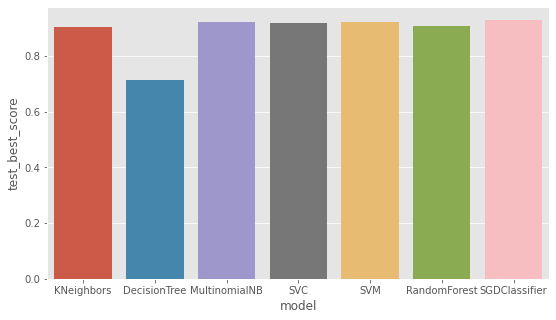

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
sns.barplot(x='model', y='test_best_score', data=d, errwidth=0)


## Evaluating the model and make predictions using the Best Model

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report


def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average='micro')
    recall = recall_score(y_true, y_preds, average='micro')
    f1 = f1_score(y_true, y_preds, average='micro')
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict


Now we make predictions using the test data to see how the model performs

In [30]:
predicted = best_model.predict(x_testcv)
evaluate_preds(y_test, predicted)


Acc: 92.92%
Precision: 0.93
Recall: 0.93
F1 score: 0.93


{'accuracy': 0.93, 'precision': 0.93, 'recall': 0.93, 'f1': 0.93}

Classification report

In [48]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted,
                                    target_names=df['author'].unique()))

                             precision    recall  f1-score   support

 Robert C. (Chamblet) Adams       0.90      0.85      0.88        41
                   Averroes       1.00      0.95      0.98        43
        Alfred William Benn       1.00      0.89      0.94        44
                  Confucius       1.00      0.97      0.99        36
Sir Thomas Clifford Allbutt       0.71      0.94      0.81        34
               T.J. de Boer       1.00      0.98      0.99        42

                   accuracy                           0.93       240
                  macro avg       0.93      0.93      0.93       240
               weighted avg       0.94      0.93      0.93       240



Confusion Matrix

In [51]:
df["author"].unique()


array(['Robert C. (Chamblet) Adams', 'Averroes', 'Alfred William Benn',
       'Confucius', 'Sir Thomas Clifford Allbutt', 'T.J. de Boer'],
      dtype=object)

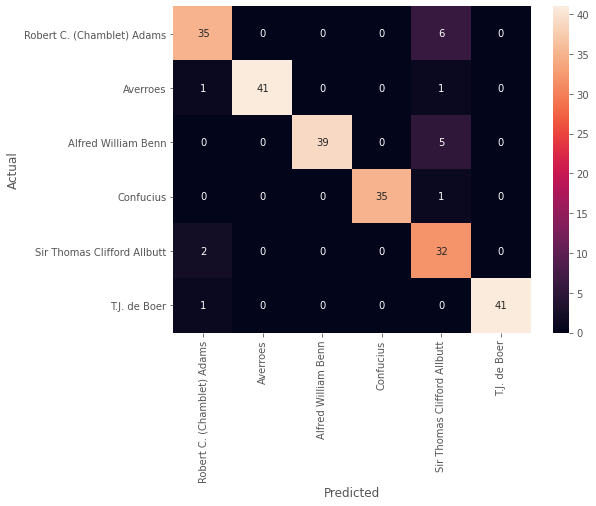

In [31]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, predicted)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=df["author"].unique(), yticklabels=df["author"].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
